In [ ]:
# generate input file of CloneTrack from bulk vdj result

In [ ]:
import pandas as pd 

In [ ]:
df = pd.read_csv("/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20230926nanda/0921-bulktcr/05.count_vdj/0921-bulktcr_filtered_annotations.csv")

In [ ]:
df = df[df["chain"]=="TRB"]
df = df.drop_duplicates(["barcode", "cdr3"])
del df["reads"]
del df["sequence_id"]
del df["high_confidence"]
del df["chain"]
del df["full_length"]
del df["productive"]
del df["is_cell"]
del df["c_gene"]
df = df.rename(columns={"cdr3":"aminoAcid", "cdr3_nt":"nucleotide", "umis":"count", "v_gene":"vGeneName", "d_gene":"dGeneName","j_gene":"jGeneName"})

In [ ]:
df["estimatedNumberGenomes"] = df["count"]
df["vFamilyName"] = df["vGeneName"].apply(lambda x: x.split('-')[0])
df["dFamilyName"] = df["dGeneName"].apply(lambda x: x.split('-')[0])
df["jFamilyName"] = df["jGeneName"].apply(lambda x: x.split('-')[0])

In [ ]:
df = df[["barcode","aminoAcid","nucleotide","count","estimatedNumberGenomes","vFamilyName","dFamilyName","jFamilyName","vGeneName","dGeneName","jGeneName"]]

In [ ]:
"""
aminoAcid	nucleotide	count	frequencyCount	estimatedNumberGenomes	vFamilyName	dFamilyName	jFamilyName	vGeneName	dGeneName	jGeneName
"""

In [ ]:
sample_list = list(set(df.barcode))

In [ ]:
for sample in sample_list:
    df_tmp = df[df["barcode"] == sample]
    sum_frequency = sum(df_tmp["count"])
    df_tmp["frequencyCount"] = df_tmp["count"]/sum_frequency
    del df_tmp["barcode"]
    df_tmp = df_tmp[["aminoAcid","nucleotide","count","frequencyCount","estimatedNumberGenomes","vFamilyName","dFamilyName","jFamilyName","vGeneName","dGeneName","jGeneName"]]
    df_tmp.to_csv(f"/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20230926nanda/clonetrack/{sample}.tsv", sep='\t', index=False)

In [ ]:
# CloneTrack

In [21]:
library(LymphoSeq)

In [33]:
?readImmunoSeq

readImmunoSeq {LymphoSeq},R Documentation
path,Path to the directory containing tab-delimited files. Only files with the extension .tsv are imported. The names of the data frames are the same as names of the files.
columns,"Column names from the tab-delimited files that you desire to import, all others will be disregarded. May use ""all"" to import all columns. A warning may be called if columns contain no data or must be coereced to a different class. Usually this warning can be ignored."
recursive,"A Boolean value indicating whether tab-delimited files in subdirectories should be imported. If TRUE, then all files in the parent as well as the subdirectory are imported. If FALSE, then only files in the parent directory are imported."


In [22]:
file.list <- readImmunoSeq(path = "/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20230926nanda/clonetrack")

  |======================================================================| 100%


In [23]:
productive.aa <- productiveSeq(file.list = file.list, aggregate = "aminoAcid")

  |======================================================================| 100%


In [24]:
top.freq <- topFreq(productive.aa = productive.aa, percent = 0.1)

In [25]:
sequence.matrix <- seqMatrix(productive.aa = productive.aa, sequences = top.freq$aminoAcid)

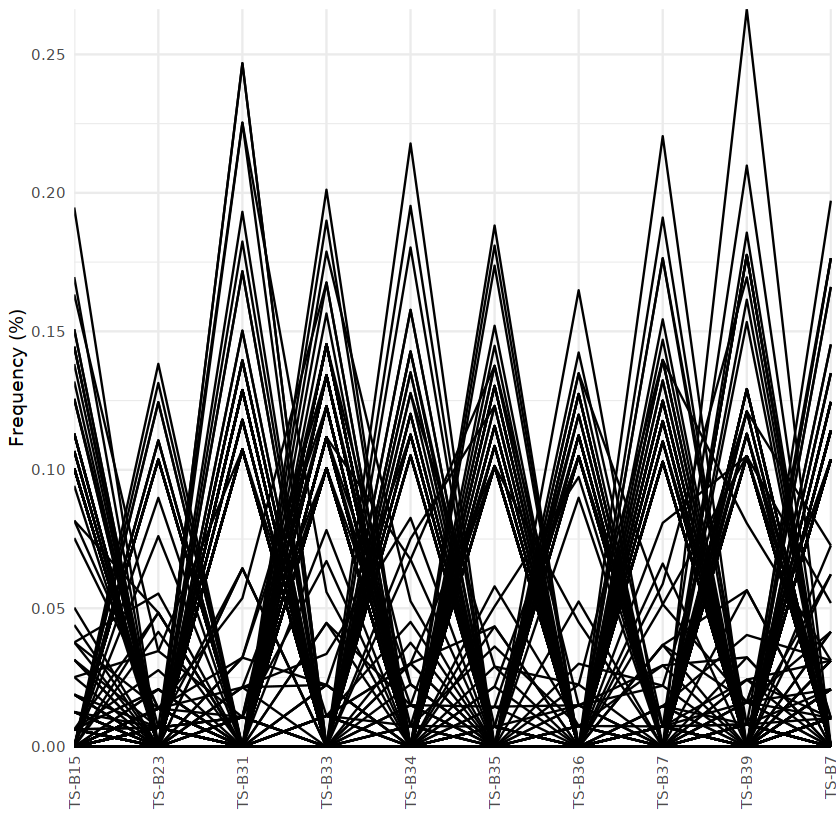

In [26]:
# Track clones without mapping or tracking specific sequences
cloneTrack(sequence.matrix = sequence.matrix)

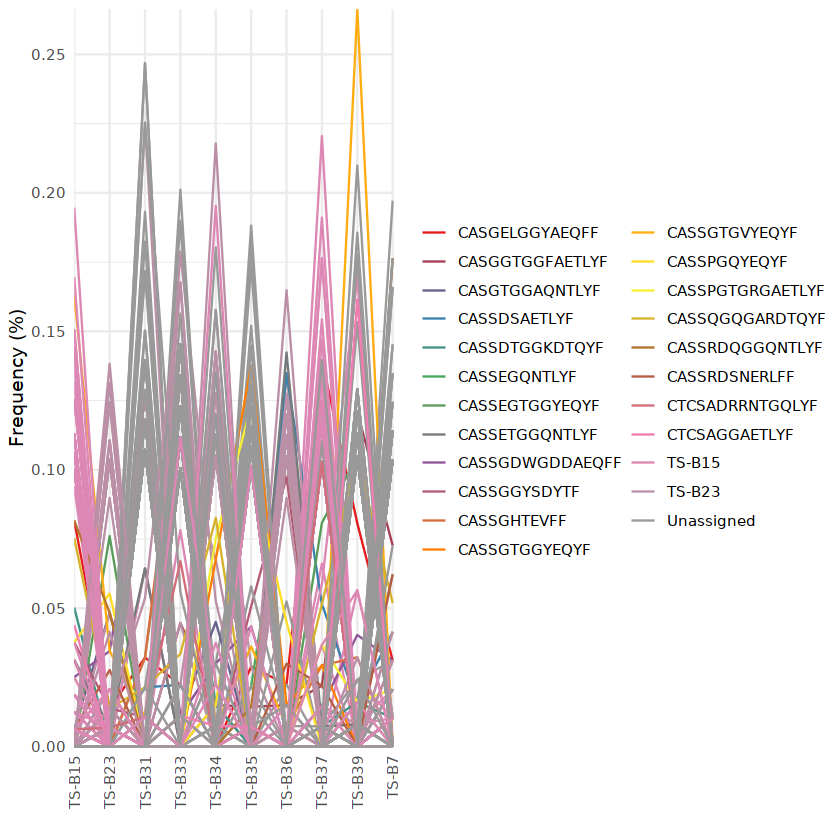

In [27]:
# Track top 20 clones mapping to the TS-B15 and TS-B23 samples
cloneTrack(sequence.matrix = sequence.matrix, productive.aa = productive.aa, 
   map = c("TS-B15", "TS-B23"), label = c("TS-B15", "TS-B23"), 
   track = top.freq$aminoAcid[1:20], unassigned = TRUE) 

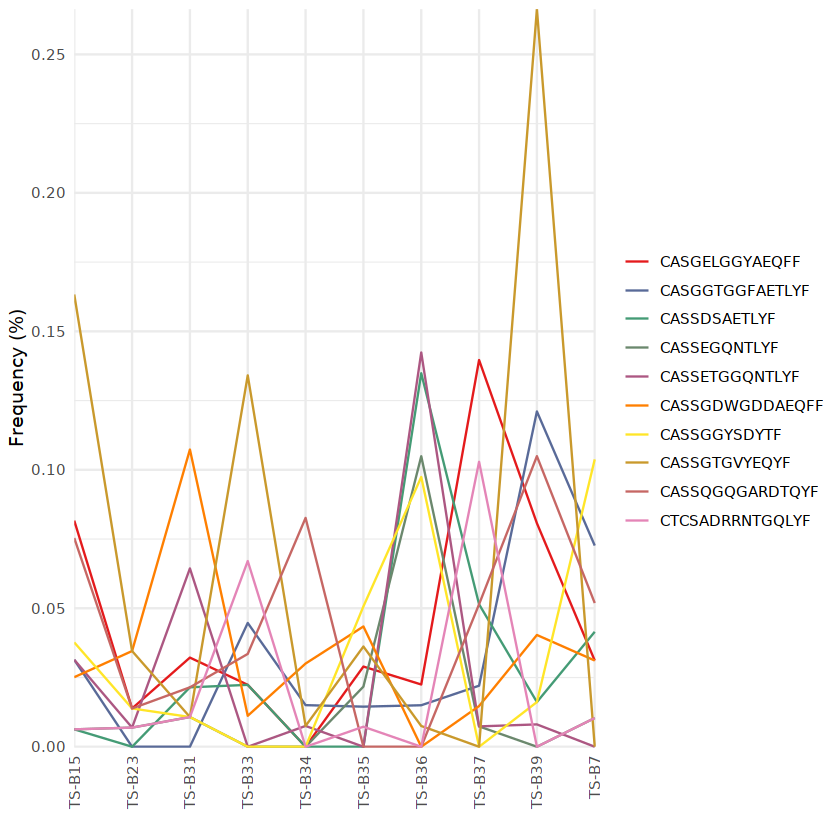

In [28]:
# Track the top 10 clones from top.freq
cloneTrack(sequence.matrix = sequence.matrix, productive.aa = productive.aa, 
   track = top.freq$aminoAcid[1:10], unassigned = FALSE) 

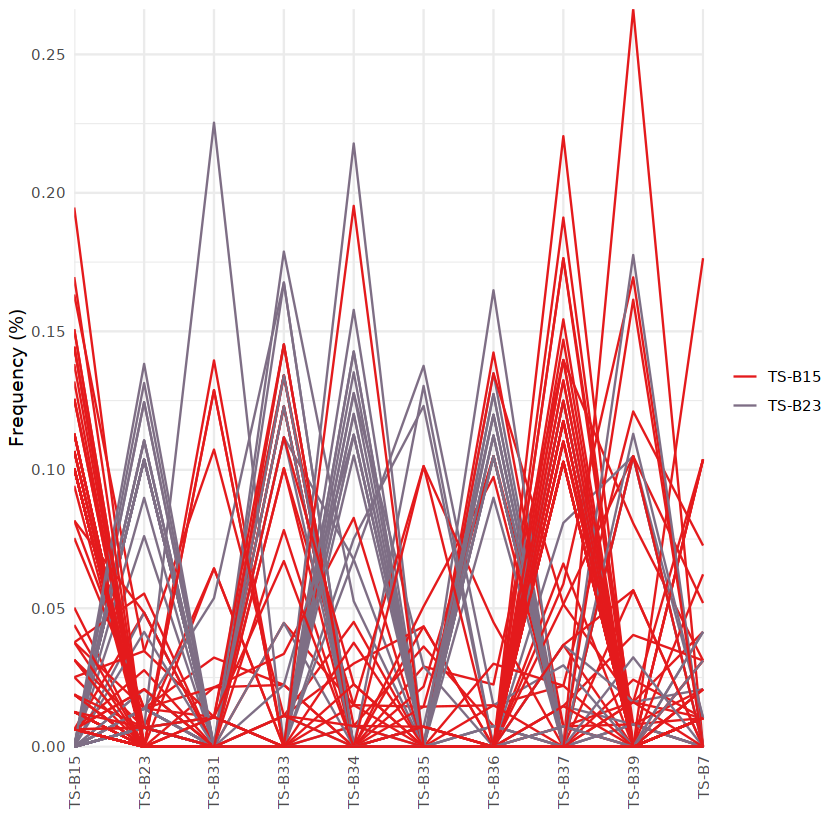

In [29]:
# Track clones mapping to the TS-B15 and TS-B23 samples while ignoring all others
cloneTrack(sequence.matrix = sequence.matrix, productive.aa = productive.aa, 
   map = c("TS-B15", "TS-B23"), label = c("TS-B15", "TS-B23"),  
   unassigned = FALSE) 

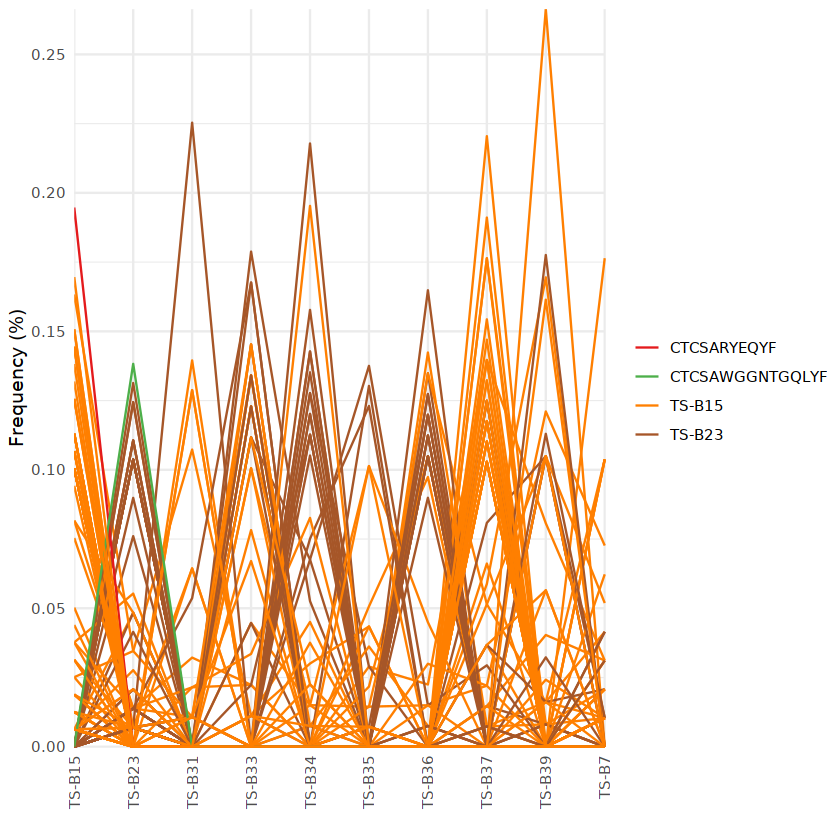

In [30]:
# Track clones mapping to the TS-B15 and TS-B23 samples and track 2 specific sequences
cloneTrack(sequence.matrix = sequence.matrix, productive.aa = productive.aa, 
   map = c("TS-B15", "TS-B23"), label = c("TS-B15", "TS-B23"), 
   track = c("CTCSARYEQYF", "CTCSAWGGNTGQLYF"), unassigned = FALSE)

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Warning message:
“Transformation introduced infinite values in continuous y-axis”


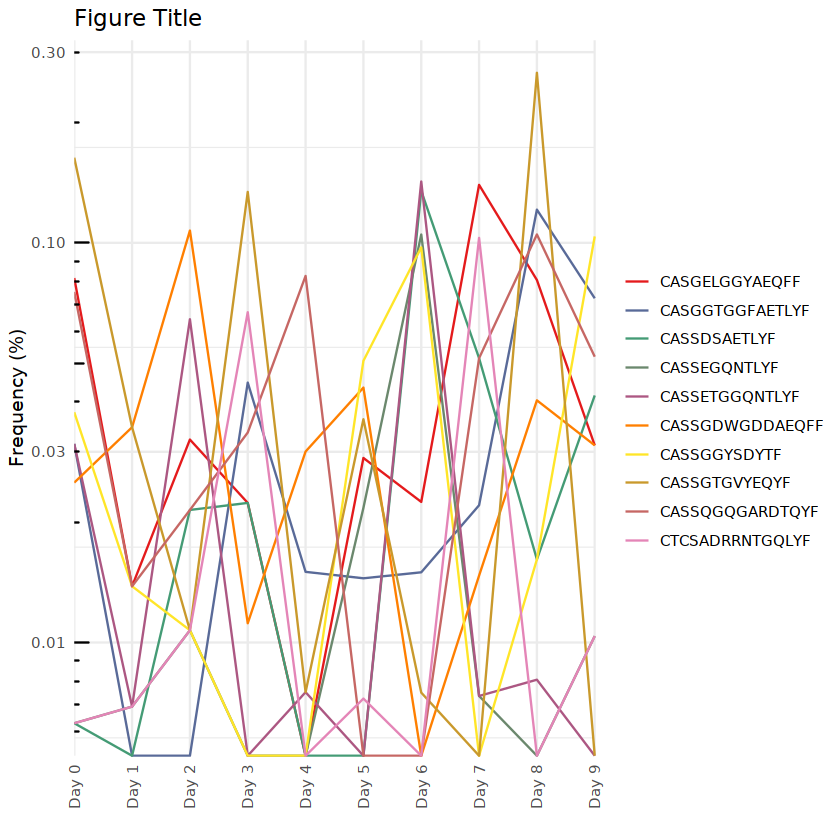

In [32]:
# Reorder the x axis, change the axis labels, convert to log scale, and add title
x.limits <- c("TS-B15", "TS-B23", 
   "TS-B31", "TS-B33", "TS-B34", "TS-B35", "TS-B36", "TS-B37", "TS-B39", "TS-B7")

sequence.matrix <- sequence.matrix[ ,c("aminoAcid", x.limits)]
   
clone.track <- cloneTrack(sequence.matrix = sequence.matrix, 
   productive.aa = productive.aa, track = top.freq$aminoAcid[1:10], unassigned = FALSE) 

x.labels <- c("Day 0", "Day 1", "Day 2", "Day 3", "Day 4", "Day 5", "Day 6", "Day 7", "Day 8", "Day 9")

clone.track + 
   ggplot2::scale_x_discrete(expand = c(0,0), labels = x.labels) + 
   ggplot2::scale_y_log10() + ggplot2::annotation_logticks(sides = "l") + 
   ggplot2::ggtitle("Figure Title")